In [2]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import LineCollection

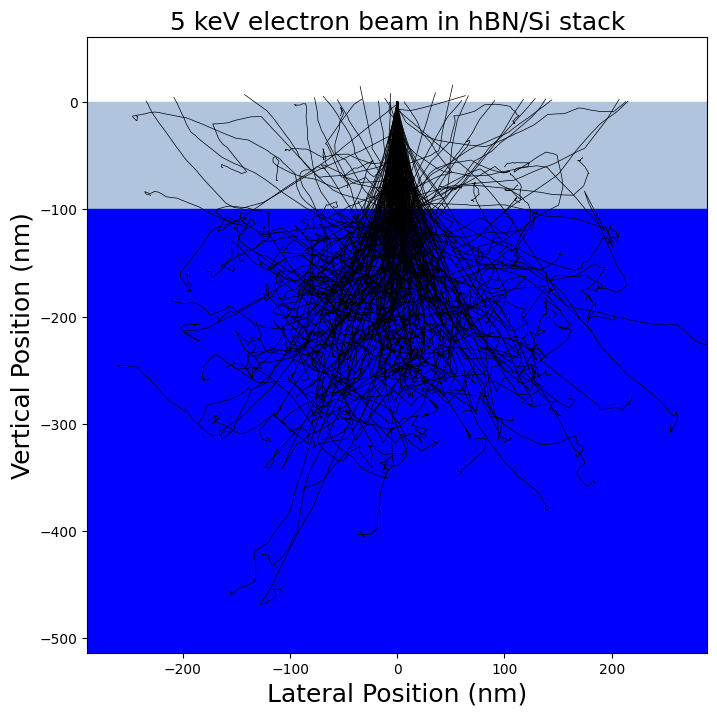

In [3]:
#quick and easy visualization. Each electron trajectory is represented as a black line

read_name = "data/hBN_100nm_Si_5kV.h5"
trajecs = []

with h5.File(read_name,'r') as h5f:
    for key in h5f.keys():
        trajecs.append(h5f[key][:])

fig,ax = plt.subplots(1,1,figsize=(8,8))

for t in trajecs:
    ax.plot(t[:,0],-t[:,2],color='k',linewidth=0.5)
ax.axis('equal')

xlims = plt.xlim()
xlims = min([abs(x) for x in xlims])
xlims = (-xlims,xlims)
ylims = plt.ylim()

sample = Rectangle((-1000,-100),2000,100,color='lightsteelblue')
ax.add_patch(sample)
sub = Rectangle((-1000,-5000),2000,4900,color='blue')
ax.add_patch(sub)
ax.set_ylim(ylims)
ax.set_xlim(xlims)

ax.set_xlabel('Lateral Position (nm)',fontsize=18)
ax.set_ylabel('Vertical Position (nm)',fontsize=18)
ax.set_title('5 keV electron beam in hBN/Si stack',fontsize=18)

plt.show()


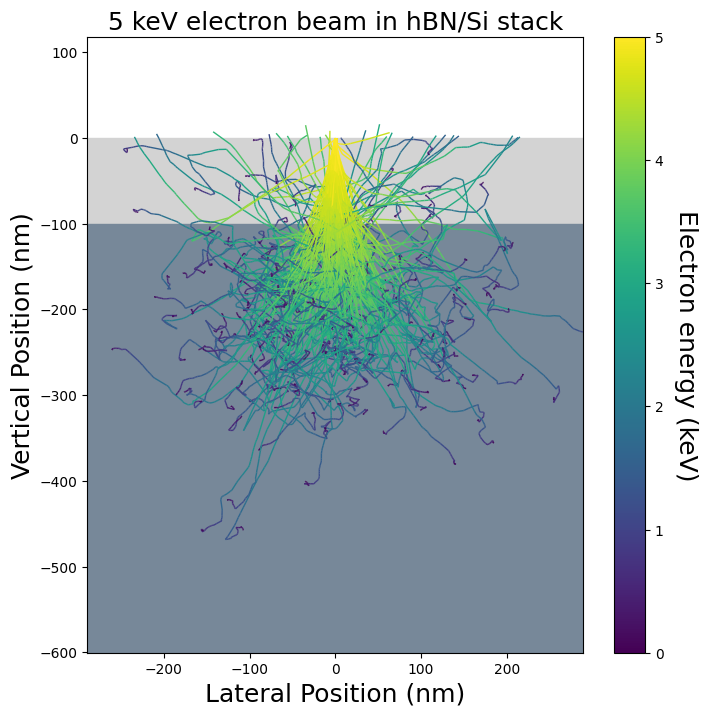

In [4]:
#More complicated and informative visualization. Now the lines are given a color scale to show the spatial 
#distribution of energy loss in the specimen.

max_energy = 5 #contrast limit

fig,ax = plt.subplots(1,1,figsize=(8,8))

norm = plt.Normalize(0,max_energy)

for t in trajecs[:]:
    ax.plot(t[:,0],-t[:,2],linewidth=0)
    
    energies = t[:,-1]
    
    points = np.array([t[:,0],-t[:,2]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    lc = LineCollection(segments, cmap='viridis', norm=norm)

    lc.set_array(energies)
    lc.set_linewidth(1)
    line = ax.add_collection(lc)
    
ax.axis('equal')

xlims = plt.xlim()
xlims = min([abs(x) for x in xlims])
xlims = (-xlims,xlims)
ylims = plt.ylim()

cbar = fig.colorbar(line,ax=ax)
cbar.set_label('Electron energy (keV)', rotation=270,fontsize=18,labelpad=25)

sample = Rectangle((-1000,-100),2000,100,color='lightgrey')
ax.add_patch(sample)
sub = Rectangle((-1000,-5000),2000,4900,color='lightslategrey')
ax.add_patch(sub)
ax.set_ylim(ylims[0],top=10)
ax.set_xlim(xlims)

ax.set_xlabel('Lateral Position (nm)',fontsize=18)
ax.set_ylabel('Vertical Position (nm)',fontsize=18)
ax.set_title('5 keV electron beam in hBN/Si stack',fontsize=18)

#plt.tight_layout()
plt.show()

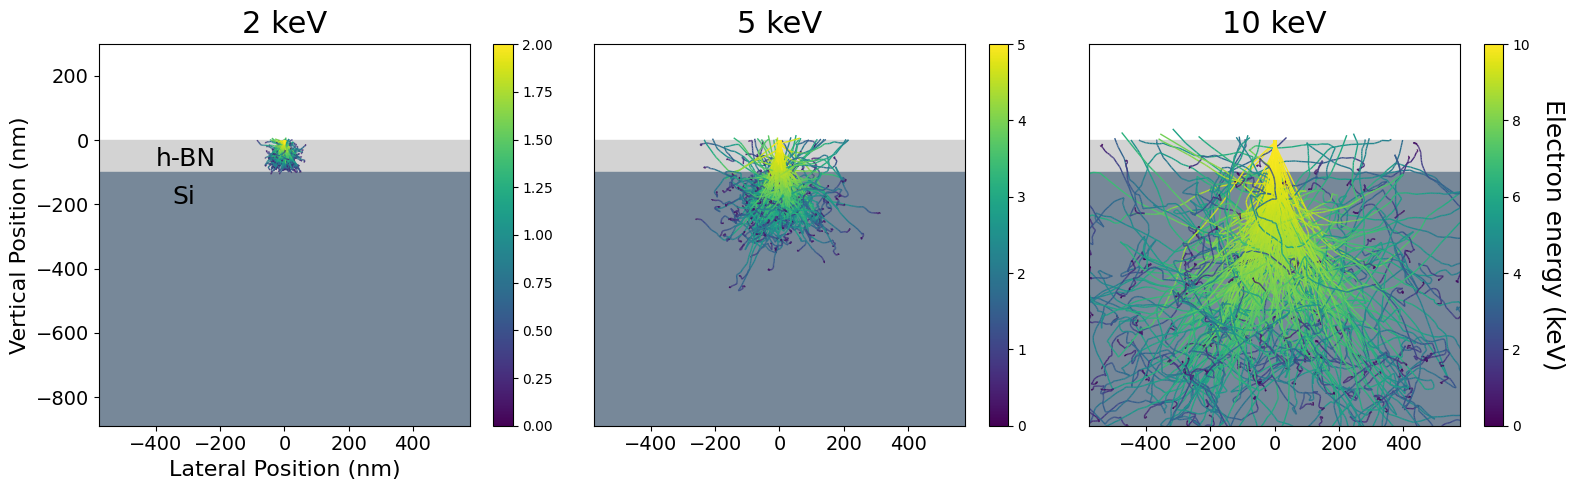

In [8]:
#putting together the visualizations from all 3 files to compare behavior between different beam energies
files = ["data/hBN_100nm_Si_2kV.h5","data/hBN_100nm_Si_5kV.h5","data/hBN_100nm_Si_10kV.h5"]

data_shuff = []
for file in files:
    trajecs = []

    with h5.File(file,'r') as h5f:
        for key in h5f.keys():
            trajecs.append(h5f[key][:])
    data_shuff.append(trajecs)
kev_list = [2,5,10]

fig,ax = plt.subplots(1,3,figsize = (16,5))
for a,b,c in zip(ax,data_shuff,kev_list):
    norm = plt.Normalize(0,c)
    for t in b[:]:
        a.plot(t[:,0],-t[:,2],linewidth=0)
    
        energies = t[:,-1]
    
        points = np.array([t[:,0],-t[:,2]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
        lc = LineCollection(segments, cmap='viridis', norm=norm)

        lc.set_array(energies)
        lc.set_linewidth(1)
        line = a.add_collection(lc)
    
    a.axis('equal')
    title = str(c) + ' keV'
    a.set_title(title,fontsize=22,pad=8)
    cbar = fig.colorbar(line,ax=a)

    sample = Rectangle((-1000,-100),2000,100,color='lightgrey')
    a.add_patch(sample)
    sub = Rectangle((-1000,-5000),2000,4900,color='lightslategrey')
    a.add_patch(sub)
    
    a.set_ylim(-600,10)
    a.set_xlim(-450,450)

ax[0].text(-400,-80,'h-BN',fontsize=18)
ax[0].text(-350,-200,'Si',fontsize=18)

ax[1].set_yticks([])
ax[2].set_yticks([])

ax[0].set_xlabel('Lateral Position (nm)',fontsize=16)
ax[0].set_ylabel('Vertical Position (nm)',fontsize=16)

cbar.set_label('Electron energy (keV)', rotation=270,fontsize=18,labelpad=25)
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()